In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
skst = pd.read_csv("skstinfo.csv", header = None)

In [16]:
skst.columns = ['SKU','STORE','COST','RETAIL', 'EXTRA']

In [17]:
display(skst)

,SKU,STORE,COST,RETAIL,EXTRA
0,3,102,123.36,440.00,0
1,3,103,123.36,440.00,0
2,3,104,123.36,440.00,0
3,3,202,123.36,440.00,0
4,3,203,123.36,440.00,0
...,...,...,...,...,...
39230141,9999997,2007,15.00,19.50,0
39230142,9999997,2707,15.00,9.75,0
39230143,9999997,3307,15.00,19.50,0
39230144,9999997,7507,15.00,19.50,0


In [19]:
skstKS = skst[skst['STORE'] == 2203]

In [ ]:
### SKU/STORE INFO FROM HIGHEST COST STORE IN KANSAS

In [23]:
display(skstKS)

,SKU,STORE,COST,RETAIL,EXTRA
62,3,2203,123.36,440.00,316.64
540,78,2203,24.30,58.00,33.70
568,91,2203,15.00,17.00,2.00
856,149,2203,114.00,255.00,141.00
962,172,2203,9.25,29.00,19.75
...,...,...,...,...,...
39228418,9999912,2203,12.36,34.00,21.64
39229161,9999950,2203,8.40,14.00,5.60
39229448,9999956,2203,28.88,44.25,15.37
39229615,9999967,2203,16.80,42.00,25.20


In [204]:
skstKS.describe()

,SKU,STORE,COST,RETAIL,EXTRA
count,2.160610e+05,216061.0,216061.000000,216061.000000,216061.000000
mean,4.967842e+06,2203.0,30.733498,51.770207,21.036709
std,2.871379e+06,0.0,53.290414,112.565478,69.899047
min,3.000000e+00,2203.0,0.000000,0.000000,-402.000000
25%,2.489277e+06,2203.0,10.400000,12.250000,-2.550000
50%,4.940696e+06,2203.0,18.000000,24.500000,6.990000
75%,7.438708e+06,2203.0,32.000000,49.500000,26.650000
max,9.999992e+06,2203.0,1193.880000,3600.000000,2406.120000


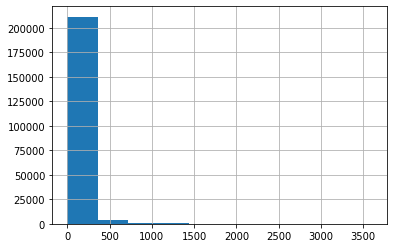

In [209]:
skstKS.RETAIL.hist()

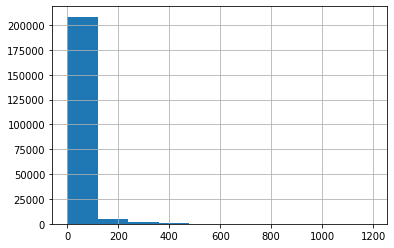

In [210]:
skstKS.COST.hist()

In [440]:
skstKS[skstKS['RETAIL'] > 3000]

,SKU,STORE,COST,RETAIL,EXTRA
4727553,1200149,2203,914.10,3300.0,2385.90
18043622,4530148,2203,1048.68,3360.0,2311.32
18919867,4750148,2203,1048.68,3360.0,2311.32
24290345,6100148,2203,1071.96,3360.0,2288.04
30007239,7590148,2203,1193.88,3600.0,2406.12
37509438,9560148,2203,899.82,3060.0,2160.18


In [ ]:
##OUTLIER CHECK, COSTS AND RETAIL AMOUNT ARE PROPORTIONAL

In [207]:
sku[(sku['SKU'] == 1200149) | (sku['SKU'] == 7590148) | (sku['SKU'] == 9560148) | (sku['SKU'] == 4530148)]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
96431,1200149,5506,185,4.000001e+11,LA312 PRISCI,SEAGREEN VLT,P15DA,1,2859400,J. VINCE
595645,7590148,5506,117,4.000001e+11,LA203 MARCEL,HICKORY LE,P12EA,1,2859400,J. VINCE


In [111]:
results = skstKS.merge(vcas, on='SKU')

In [114]:
results

,SKU,STORE,COST,RETAIL,EXTRA,AMTSOLD,SKUNET
0,78,2203,24.30,58.00,33.70,3,101.10
1,387,2203,38.00,79.00,41.00,2,82.00
2,450,2203,2.00,0.99,-1.01,4,-4.04
3,561,2203,9.60,24.00,14.40,2,28.80
4,629,2203,10.00,24.00,14.00,4,56.00
...,...,...,...,...,...,...,...
106556,9999703,2203,40.50,90.00,49.50,1,49.50
106557,9999784,2203,7.00,13.00,6.00,3,18.00
106558,9999802,2203,10.85,28.00,17.15,1,17.15
106559,9999813,2203,275.00,297.50,22.50,1,22.50


In [ ]:
#FINDING MOST valuable items from amount of times sold * profit

In [113]:
results['SKUNET'] = results['EXTRA'] * results['AMTSOLD']

In [ ]:
results.sortby

In [22]:
skstKS['EXTRA'] = skstKS['RETAIL'] - skstKS['COST']

/Users/aneeshkudaravalli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
display(x)

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,ORDERID
157,78,2203,460,600,567100427,2005-06-17,P,1,58.0,58.0,58.0,311700006,254,2203460600
158,78,2203,550,5300,674600421,2005-08-14,P,1,58.0,58.0,58.0,613700003,254,22035505300
159,78,2203,590,1800,674600421,2005-08-22,R,1,58.0,58.0,58.0,627500003,254,22035901800
720,268,2203,173,93700,991904334,2004-09-29,P,1,36.0,36.0,36.0,296800006,208,220317393700
721,268,2203,630,2700,0,2004-10-09,P,1,36.0,36.0,36.0,178600006,208,22036302700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120904730,9999950,2203,830,3800,0,2005-03-04,P,1,13.5,13.5,13.5,644500123,281,22038303800
120904731,9999950,2203,830,6300,290800407,2004-10-05,P,1,13.5,13.5,13.5,216900062,281,22038306300
120904732,9999950,2203,830,6500,0,2004-10-12,P,1,13.5,13.5,13.5,791800068,281,22038306500
120904733,9999950,2203,830,9900,0,2004-10-09,P,1,13.5,13.5,13.5,302900109,281,22038309900


In [105]:
valuec = x.SKU.value_counts()

In [106]:
vcas = pd.DataFrame(valuec)

In [107]:
vcas.columns = ['AMTSOLD']

In [109]:
vcas.index.name = 'SKU'

In [110]:
vcas

,AMTSOLD
SKU,
4108011,2535
3524026,1853
5528349,1846
3978011,1839
2783996,1338
...,...
1363479,1
8348407,1
4156150,1


In [70]:
valuec

4108011    2535
3524026    1853
5528349    1846
3978011    1839
2783996    1338
           ... 
1363479       1
8348407       1
4156150       1
4533803       1
8188          1
Name: SKU, Length: 189903, dtype: int64

In [116]:
results500 = results.sort_values('SKUNET', ascending = 0).head(500)

In [ ]:
#### TOP 500 SKUS at KS store sorted by profit times amount of times purchased

In [21]:
store = pd.read_csv("strinfo2.csv", header = None)
store.head()

,0,1,2,3
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281


In [117]:
results500

,SKU,STORE,COST,RETAIL,EXTRA,AMTSOLD,SKUNET
38038,3524026,2203,13.8,23.0,9.2,1853,17047.6
60116,5528349,2203,13.2,22.0,8.8,1846,16244.8
104908,9836218,2203,60.0,100.0,40.0,398,15920.0
42999,3978011,2203,11.4,19.0,7.6,1839,13976.4
10296,994478,2203,41.7,69.5,27.8,419,11648.2
...,...,...,...,...,...,...,...
22232,2123005,2203,89.1,198.0,108.9,7,762.3
30518,2877851,2203,114.9,495.0,380.1,2,760.2
82071,7621150,2203,16.0,35.0,19.0,40,760.0
63994,5901685,2203,22.8,38.0,15.2,50,760.0


In [359]:
skuuu = pd.read_csv("skuinfo.csv", header = None)

/Users/aneeshkudaravalli/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [365]:
display(skuuu)

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
0,3,6505,113,4.000000e+11,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY,0,1,NaN
1,4,8101,2,4.000000e+11,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR,0,NaN,NaN
2,5,7307,3,4.000000e+11,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE,0,NaN,NaN
3,8,3404,00B,4.000000e+11,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI,0,NaN,NaN
4,15,2301,4,4.000000e+11,126 MDU461,255CAMEL,12,1,23272,JONES/LA,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048571,6696641,6404,901,4.000070e+11,011016891TEX,TX ORANGE,L,1,8523315,NEXT MAR,0,NaN,NaN
1048572,6696642,7101,4,4.000070e+11,593063,BLACK,6,1,6516189,REPUBLIC,0,NaN,NaN
1048573,6696645,4303,6,4.000070e+11,L 2P3F76,001 BLACK,1,1,7620777,RAMPAGE,0,NaN,NaN
1048574,6696647,3701,455,4.000070e+11,73 7-7495,BURG,20,1,1013023,JESSICA,0,NaN,NaN


In [364]:
skuuu.columns = ['SKU','DEPT','CLASSID','UPC','STYLE','COLOR','SIZE','PACKSIZE','VENDOR','BRAND','EXTRA','EXTRA','EXTRA']

In [23]:
store.columns = ['STORE','CITY','STATE','ZIP']

In [36]:
store[(store['STORE'] == 2203) | (store['STORE'] == 8402) | (store['STORE'] == 209) | (store['STORE'] == 7507) | (store['STORE'] == 9103) | (store['STORE'] == 504) | (store['STORE'] == 2109) | (store['STORE'] == 9304) | (store['STORE'] == 8109) | (store['STORE'] == 2102)]



### info on TOP 10 stores in terms of costs

,STORE,CITY,STATE,ZIP
21,209,SCOTTSDALE,AZ,85251
38,504,LITTLE ROCK,AR,72205
109,2102,ORLANDO,FL,32809
113,2109,ALBUQUERQUE,NM,87110
116,2203,OVERLAND PARK,KS,66214
348,7507,HOUSTON,TX,77056
376,8109,LITTLETON,CO,80124
385,8402,METAIRIE,LA,70002
416,9103,LOUISVILLE,KY,40207
426,9304,OKLAHOMA CITY,OK,73118


In [13]:
df.columns = ['SKU','STORE','COST','RETAIL']

In [15]:
x = df.groupby('STORE').sum()
x

,SKU,COST,RETAIL
STORE,,,
100,2588283421,40376.41,9.508716e+04
102,446644294014,2640056.86,4.705540e+06
103,373468974217,2182063.06,4.178714e+06
104,143408542959,829967.89,1.956593e+06
107,384920918852,2221514.99,4.166531e+06
...,...,...,...
9706,95671268133,389012.23,7.199413e+05
9709,243728143274,946350.90,1.597461e+06
9804,200702303672,903791.76,1.718727e+06


In [19]:
x.sort_values('COST', ascending = 0).head(50)

,SKU,COST,RETAIL
STORE,,,
2203,529636267213,3310780.46,5.597186e+06
8402,510038991471,3204057.65,5.794243e+06
209,471654699461,2946128.77,5.465774e+06
7507,405954119197,2913697.15,5.575492e+06
9103,473492557439,2853107.70,5.233510e+06
504,430751289108,2851279.90,5.612492e+06
2109,456524422618,2768594.07,5.199715e+06
9304,433184133277,2750369.85,5.501624e+06
8109,439446268974,2693801.73,4.548965e+06


In [ ]:
### top stores sorted by highest costs from sku store info table 

In [46]:
df.to_csv(r'skstinfo3.csv', index = False)

In [231]:
yuh2.to_csv(r'targets2.csv', index = False)

In [237]:
d2.to_csv(r'targets3.csv', index = False)

In [239]:
d2.to_csv(r'targets4.csv')

In [3]:
trnsact = pd.read_csv("trnsact.csv", header = None)

In [5]:
trnsact.columns = ['SKU','STORE','REGISTER','TRANNUM','SEQ','SALEDATE','STYPE','QUANTITY','ORGPRICE','SPRICE','AMT','INTERID','MIC','ORDERID']


In [6]:
trnsact.head(200)

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,ORDERID
0,3,202,290,1100,326708721,2005-01-18,P,1,0.0,30.00,30.00,3500000,818,0
1,3,202,540,2700,326708721,2005-01-29,R,1,0.0,30.00,30.00,15200000,818,0
2,3,303,500,2100,23702074,2004-08-18,P,1,0.0,12.00,12.00,4600000,48,0
3,3,709,360,500,0,2005-08-14,P,1,0.0,30.00,30.00,6500000,818,0
4,3,802,660,400,0,2005-08-09,P,1,440.0,30.00,30.00,4700000,599,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,123,6102,690,1500,0,2005-08-20,P,1,80.0,49.99,49.99,386900008,150,0
196,123,8302,350,2700,888809695,2005-07-09,P,1,80.0,80.00,80.00,9500006,150,0
197,131,102,220,200,64303066,2005-07-02,P,1,52.0,33.15,33.15,716700008,48,0
198,131,102,340,600,0,2005-08-11,P,1,52.0,26.00,26.00,413700005,48,0


In [6]:
x = trnsact[(trnsact['STORE'] == 2203)]

In [ ]:
#subset to only the one train store

In [415]:
testtrns = trnsact[(trnsact['STORE'] == 8402)]

In [ ]:
#subset to only the test store

In [416]:
display(testtrns)

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,ORDERID
259,131,8402,190,2100,168309157,2005-07-29,P,1,52.0,27.3,27.3,306800009,48,0
260,131,8402,190,6400,280309280,2005-06-23,P,1,52.0,52.0,52.0,286800004,48,0
479,164,8402,150,600,0,2005-08-10,P,1,20.0,20.0,20.0,352400005,822,0
480,164,8402,150,1100,0,2005-07-29,P,1,20.0,20.0,20.0,860200009,822,0
532,180,8402,240,2200,0,2005-07-18,P,1,25.0,25.0,25.0,395000004,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120914762,9999950,8402,131,21900,542008972,2005-04-16,P,1,13.5,13.5,13.5,137900118,281,0
120914763,9999950,8402,131,28200,0,2004-10-16,P,1,13.5,13.5,13.5,822600118,281,0
120914764,9999950,8402,162,5300,0,2005-04-23,P,1,13.5,13.5,13.5,215900116,281,0
120914765,9999950,8402,830,3800,729805370,2004-10-12,P,1,13.5,13.5,13.5,789400068,281,0


In [13]:
display(x)

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,ORDERID
157,78,2203,460,600,567100427,2005-06-17,P,1,58.0,58.0,58.0,311700006,254,2203460600
158,78,2203,550,5300,674600421,2005-08-14,P,1,58.0,58.0,58.0,613700003,254,22035505300
159,78,2203,590,1800,674600421,2005-08-22,R,1,58.0,58.0,58.0,627500003,254,22035901800
720,268,2203,173,93700,991904334,2004-09-29,P,1,36.0,36.0,36.0,296800006,208,220317393700
721,268,2203,630,2700,0,2004-10-09,P,1,36.0,36.0,36.0,178600006,208,22036302700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120904730,9999950,2203,830,3800,0,2005-03-04,P,1,13.5,13.5,13.5,644500123,281,22038303800
120904731,9999950,2203,830,6300,290800407,2004-10-05,P,1,13.5,13.5,13.5,216900062,281,22038306300
120904732,9999950,2203,830,6500,0,2004-10-12,P,1,13.5,13.5,13.5,791800068,281,22038306500
120904733,9999950,2203,830,9900,0,2004-10-09,P,1,13.5,13.5,13.5,302900109,281,22038309900


In [9]:
x['ORDERID'] = x['STORE'].map(str) + x['REGISTER'].map(str) + x['TRANNUM'].map(str)

/Users/aneeshkudaravalli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [418]:
testskutrns['ORDERID'] = testskutrns['STORE'].map(str) + testskutrns['REGISTER'].map(str) + testskutrns['TRANNUM'].map(str)

/Users/aneeshkudaravalli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
x2.SKU.value_counts()

3524026    1853
5528349    1846
3978011    1839
2698353    1292
3161221    1070
           ... 
258604        2
2877851       2
5397432       2
9397666       2
1776023       1
Name: SKU, Length: 500, dtype: int64

In [ ]:
#Frequency of top 500 SKUs considered in association rules

In [122]:
x2 = x[x['SKU'].isin(results500['SKU'])]

In [417]:
testskutrns = testtrns[testtrns['SKU'].isin(results500['SKU'])]

In [420]:
display(testskutrns)

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,ORDERID
78414,7915,8402,1,11200,19301830,2005-04-05,P,1,19.5,19.5,19.5,598200045,281,8402111200
78415,7915,8402,51,2500,735900492,2005-04-05,P,1,19.5,19.5,19.5,598300045,281,8402512500
78416,7915,8402,70,200,0,2004-08-07,P,1,19.5,19.5,19.5,873500163,281,840270200
78417,7915,8402,70,200,0,2004-09-10,P,1,19.5,19.5,19.5,783100103,281,840270200
78418,7915,8402,70,200,755002170,2004-11-20,P,1,19.5,19.5,19.5,87500112,281,840270200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120894120,9999170,8402,131,15600,905000492,2004-10-22,P,1,16.5,16.5,16.5,273700070,281,840213115600
120894121,9999170,8402,162,5500,0,2005-04-23,P,1,16.5,16.5,16.5,42900107,281,84021625500
120894122,9999170,8402,221,1200,0,2005-04-05,P,1,16.5,16.5,16.5,344200067,281,84022211200
120894123,9999170,8402,830,3900,0,2005-04-05,P,1,16.5,16.5,16.5,344300067,281,84028303900


In [123]:
display(x2)

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,ORDERID
68974,7915,2203,280,4100,0,2004-12-01,P,1,19.5,19.5,19.5,977300097,281,22032804100
68975,7915,2203,290,700,0,2005-03-04,P,1,19.5,19.5,19.5,827800104,281,2203290700
68976,7915,2203,290,1100,0,2004-10-15,P,1,19.5,19.5,19.5,678600072,281,22032901100
68977,7915,2203,290,5600,511605730,2005-02-26,P,1,19.5,19.5,19.5,122500358,281,22032905600
68978,7915,2203,320,300,0,2005-07-20,P,1,19.5,19.5,19.5,14700037,281,2203320300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120886606,9999170,2203,830,6100,373204230,2005-02-27,P,1,16.5,16.5,16.5,225200068,281,22038306100
120886607,9999170,2203,830,9800,348800409,2004-10-09,P,1,16.5,16.5,16.5,818100105,281,22038309800
120886608,9999170,2203,830,11000,0,2004-10-09,P,1,16.5,16.5,16.5,817900105,281,220383011000
120886609,9999170,2203,830,15800,0,2005-03-05,P,1,16.5,16.5,16.5,59100174,281,220383015800


In [125]:
onehot = pd.get_dummies(x2['SKU'],prefix='SKU')

In [422]:
testonehot = pd.get_dummies(testskutrns['SKU'], prefix = 'SKU')

In [423]:
test3 = pd.concat([testskutrns,testonehot],axis=1)

In [126]:
x3 = pd.concat([x2,onehot],axis=1)

In [129]:
display(x3)

,ORDERID,SKU_7915,SKU_9633,SKU_19171,SKU_19633,SKU_29633,SKU_39171,SKU_39633,SKU_59633,SKU_94337,...,SKU_9891900,SKU_9904336,SKU_9906712,SKU_9908506,SKU_9911900,SKU_9953551,SKU_9956712,SKU_9957390,SKU_9978362,SKU_9999170
68974,22032804100,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68975,2203290700,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68976,22032901100,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68977,22032905600,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68978,2203320300,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120886606,22038306100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
120886607,22038309800,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
120886608,220383011000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
120886609,220383015800,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
##Preparing dataset for association rules

In [424]:
test3 = test3.drop(['SKU','STORE','REGISTER','TRANNUM','SEQ','SALEDATE','STYPE','QUANTITY','ORGPRICE','SPRICE','AMT','INTERID','MIC'], axis = 1)

In [128]:
x3 = x3.drop(['SKU','STORE','REGISTER','TRANNUM','SEQ','SALEDATE','STYPE','QUANTITY','ORGPRICE','SPRICE','AMT','INTERID','MIC'], axis = 1)

In [130]:
finalD = x3.groupby(['ORDERID']).sum()

In [426]:
testFinalD = test3.groupby(['ORDERID']).sum()

In [428]:
display(testFinalD)

,SKU_7915,SKU_9633,SKU_19171,SKU_19633,SKU_29633,SKU_39171,SKU_39633,SKU_59633,SKU_94337,SKU_108507,...,SKU_9891900,SKU_9904336,SKU_9906712,SKU_9908506,SKU_9911900,SKU_9953551,SKU_9956712,SKU_9957390,SKU_9978362,SKU_9999170
ORDERID,,,,,,,,,,,,,,,,,,,,,
840210111000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84021013100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84021015100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84021015600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84021017100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84029905900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84029907600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8402990800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
finalD.SKU_264715.describe()

count    3162.000000
mean        0.278621
std         1.046459
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: SKU_264715, dtype: float64

In [22]:
finalD.to_csv(r'AKASD.csv')

In [132]:
def ones(x):
    if x > 0:
        return 1
    else:
        return 0
        

In [133]:
finalD = finalD.applymap(ones)

In [427]:
testFinalD = testFinalD.applymap(ones)

In [48]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [135]:
frequentItemsets = apriori(finalD, min_support=0.01, use_colnames=True, max_len = 3, low_memory = True)

In [ ]:
##main association rules used for analysis

In [429]:
testsets = apriori(testFinalD, min_support=0.01, use_colnames=True, max_len = 3, low_memory = True)

In [136]:
rules = association_rules(frequentItemsets, metric="lift", min_threshold=1)

In [430]:
testrules = association_rules(testsets, metric="lift", min_threshold=1)

In [ ]:
#rules on test set

In [137]:
display(frequentItemsets)

,support,itemsets
0,0.020732,(SKU_7915)
1,0.021220,(SKU_9633)
2,0.021463,(SKU_19171)
3,0.024878,(SKU_19633)
4,0.032439,(SKU_29633)
...,...,...
420288,0.014878,"(SKU_9867297, SKU_9908506, SKU_9911900)"
420289,0.010732,"(SKU_9999170, SKU_9867297, SKU_9911900)"
420290,0.010488,"(SKU_9880895, SKU_9908506, SKU_9911900)"
420291,0.016585,"(SKU_9888506, SKU_9908506, SKU_9911900)"


In [138]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,2.457208e+06,2.457208e+06,2.457208e+06,2.457208e+06,2.457208e+06,2.457208e+06,2.457208e+06
mean,3.719212e-02,3.719212e-02,1.437497e-02,4.936099e-01,1.411172e+01,1.326131e-02,inf
std,2.286338e-02,2.286338e-02,4.469582e-03,2.303788e-01,3.522241e+00,3.955165e-03,NaN
min,1.000000e-02,1.000000e-02,1.000000e-02,7.081174e-02,4.733896e+00,8.415586e-03,1.064134e+00
25%,2.073171e-02,2.073171e-02,1.121951e-02,3.025641e-01,1.210371e+01,1.044081e-02,1.403297e+00
50%,3.097561e-02,3.097561e-02,1.292683e-02,4.609929e-01,1.390401e+01,1.208067e-02,1.797088e+00
75%,4.658537e-02,4.658537e-02,1.609756e-02,6.729560e-01,1.565739e+01,1.481285e-02,2.919259e+00
max,1.412195e-01,1.412195e-01,8.804878e-02,1.000000e+00,4.702098e+01,6.944914e-02,inf


In [431]:
testrules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,2.611096e+06,2.611096e+06,2.611096e+06,2.611096e+06,2.611096e+06,2.611096e+06,2.611096e+06
mean,3.564586e-02,3.564586e-02,1.587246e-02,5.279475e-01,1.535952e+01,1.477977e-02,inf
std,1.835828e-02,1.835828e-02,5.595479e-03,2.225841e-01,2.812941e+00,5.102146e-03,NaN
min,1.001192e-02,1.001192e-02,1.001192e-02,8.641975e-02,6.321579e+00,8.769166e-03,1.082853e+00
25%,2.193087e-02,2.193087e-02,1.168057e-02,3.463687e-01,1.368431e+01,1.098845e-02,1.495274e+00
50%,3.098927e-02,3.098927e-02,1.430274e-02,5.027933e-01,1.512566e+01,1.330808e-02,1.946126e+00
75%,4.529201e-02,4.529201e-02,1.835518e-02,6.972477e-01,1.668910e+01,1.706157e-02,3.154912e+00
max,1.158522e-01,1.158522e-01,7.389750e-02,1.000000e+00,3.811162e+01,6.312697e-02,inf


In [151]:
rules[ rules['lift'] >= 40].describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,0.016011,0.016011,0.010473,0.669802,41.866081,0.010223,3.380138
std,0.002544,0.002544,0.000517,0.105815,1.588167,0.000504,1.329430
min,0.012195,0.012195,0.010000,0.511905,40.023810,0.009750,2.022796
25%,0.013415,0.013415,0.010000,0.569444,40.688345,0.009764,2.291424
50%,0.015610,0.015610,0.010244,0.645709,41.513983,0.010002,2.779044
75%,0.018049,0.018049,0.010732,0.763636,42.607463,0.010493,4.151055
max,0.021707,0.021707,0.011951,0.890909,47.020979,0.011673,8.976626


In [442]:
rules[(rules['support'] >= rules['antecedent support']) | (rules['support'] >= rules['consequent support'])].describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,12554.000000,12554.000000,12554.000000,12554.000000,12554.000000,12554.000000,1.255400e+04
mean,0.064628,0.064628,0.012548,0.557305,9.262350,0.011068,inf
std,0.055427,0.055427,0.002425,0.443599,3.297688,0.002068,NaN
min,0.010000,0.010000,0.010000,0.070812,7.081174,0.008588,1.065446e+00
25%,0.011951,0.011951,0.010732,0.106538,7.081174,0.009530,1.104510e+00
50%,0.031951,0.031951,0.011951,0.702797,7.592593,0.010528,inf
75%,0.131707,0.131707,0.013659,1.000000,10.732984,0.012071,inf
max,0.141220,0.141220,0.030976,1.000000,30.370370,0.026601,inf


In [191]:
rules2.at[8210,'antecedents'] == '{(SKU_1699998)}'

False

In [433]:
testrules[testrules['lift'] >= 30].describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000
mean,0.019069,0.019069,0.011051,0.600929,31.566463,0.010700,2.800212
std,0.003889,0.003889,0.001040,0.119426,1.526442,0.001004,1.579153
min,0.010250,0.010250,0.010012,0.308824,30.000761,0.009678,1.431978
25%,0.015971,0.015971,0.010250,0.505650,30.395247,0.009929,1.990552
50%,0.018355,0.018355,0.010727,0.580247,31.023934,0.010396,2.337846
75%,0.022169,0.022169,0.011442,0.701493,32.257311,0.011084,3.274136
max,0.032420,0.032420,0.015971,0.976744,38.111616,0.015453,41.605959


In [202]:
yuh = rules[((rules['support'] >= rules['antecedent support']) | (rules['support'] >= rules['consequent support'])) & (rules['lift'] > 22) & (rules['confidence'] > .25)]

In [ ]:
#MODIFIED MIN SUPPORT SUBSET plus additional confidence and lift constraints

In [434]:
testrules[((testrules['support'] >= testrules['antecedent support']) | (testrules['support'] >= testrules['consequent support'])) & (testrules['lift'] > 22) & (testrules['confidence'] > .25)]



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
588532,"(SKU_4697737, SKU_593921)",(SKU_2938210),0.010727,0.045292,0.010727,1.000000,22.078947,0.010241,inf
1141289,"(SKU_2170445, SKU_2744854)",(SKU_7567468),0.012157,0.036234,0.012157,1.000000,27.598684,0.011717,inf
1141292,(SKU_7567468),"(SKU_2170445, SKU_2744854)",0.036234,0.012157,0.012157,0.335526,27.598684,0.011717,1.486654
1141715,"(SKU_4674761, SKU_2170445)",(SKU_7567468),0.010489,0.036234,0.010489,1.000000,27.598684,0.010109,inf
1141718,(SKU_7567468),"(SKU_4674761, SKU_2170445)",0.036234,0.010489,0.010489,0.289474,27.598684,0.010109,1.392646
1614815,"(SKU_6678353, SKU_2734854)",(SKU_7567468),0.011681,0.036234,0.011681,1.000000,27.598684,0.011257,inf
1614818,(SKU_7567468),"(SKU_6678353, SKU_2734854)",0.036234,0.011681,0.011681,0.322368,27.598684,0.011257,1.458491
1674238,"(SKU_4697737, SKU_4668011)",(SKU_2938210),0.012634,0.045292,0.012634,1.000000,22.078947,0.012062,inf
1674243,(SKU_2938210),"(SKU_4697737, SKU_4668011)",0.045292,0.012634,0.012634,0.278947,22.078947,0.012062,1.369340
2485600,"(SKU_6678353, SKU_4703769)",(SKU_5617621),0.011204,0.036472,0.011204,1.000000,27.418301,0.010795,inf


In [380]:
targcor.Con_SKU1.value_counts()

776350     31
2988370    23
6420710    16
1184024     5
Name: Con_SKU1, dtype: int64

In [435]:
skuuu[skuuu['SKU'] == 2938210]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
458600,2938210,800,7,4.000080e+11,6FCR80,HOLIDAY PWP,HOL04 PWP,36,5511283,CLINIQUE,0,NaN,NaN


In [437]:
skuuu[skuuu['SKU'] == 2744854]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
428467,2744854,2200,4,4.000050e+11,2105,08LIGHT BUFF,MAQUICOMPL,3,113645,LANCOME,0,NaN,NaN


In [439]:
skuuu[skuuu['SKU'] == 7567468]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA


In [213]:
yuh.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.023012,0.029419,0.011269,0.710003,24.506008,0.010804,inf
std,0.014633,0.015147,0.001189,0.352425,2.360518,0.001131,NaN
min,0.010000,0.010000,0.010000,0.251397,22.043011,0.009546,1.321159
25%,0.010488,0.011707,0.010244,0.284879,22.905028,0.009867,1.380886
50%,0.012195,0.036829,0.010976,1.000000,23.727963,0.010529,inf
75%,0.040732,0.043659,0.011951,1.000000,27.152318,0.011429,inf
max,0.045366,0.045366,0.017561,1.000000,30.370370,0.016764,inf


In [49]:
sku[(sku['SKU'] == 2716578) | (sku['SKU'] == 3908011) | (sku['SKU'] == 3988011)]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
214388,2716578,800,001,4.000066e+11,6EM7,DDM GEL,1.7 OZ,3,5511283,CLINIQUE
320426,3908011,800,001,4.000080e+11,6102,XSTRENGTH,W/DISH,6,5511283,CLINIQUE
327868,3988011,800,001,4.000080e+11,6125,CLARIFY,#3 6 OZ,3,5511283,CLINIQUE


In [160]:
frequentItemsets2 = apriori(finalD, min_support=0.01, use_colnames=True, max_len = 2, low_memory = True)

In [161]:
display(frequentItemsets2)

,support,itemsets
0,0.020732,(SKU_7915)
1,0.021220,(SKU_9633)
2,0.021463,(SKU_19171)
3,0.024878,(SKU_19633)
4,0.032439,(SKU_29633)
...,...,...
15972,0.012683,"(SKU_9999170, SKU_9888506)"
15973,0.023902,"(SKU_9908506, SKU_9911900)"
15974,0.010976,"(SKU_9999170, SKU_9908506)"
15975,0.015854,"(SKU_9999170, SKU_9911900)"


In [162]:
rules2 = association_rules(frequentItemsets2, metric="lift", min_threshold=1)

In [441]:
rules2.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,31312.000000,31312.000000,31312.000000,31312.000000,31312.000000,31312.000000,3.131200e+04
mean,0.043261,0.043261,0.017972,0.457358,11.445443,0.016157,inf
std,0.021414,0.021414,0.007583,0.160652,3.780542,0.006392,NaN
min,0.010000,0.010000,0.010000,0.084629,4.733896,0.008515,1.077532e+00
25%,0.029024,0.029024,0.012683,0.335329,9.361733,0.011542,1.458191e+00
50%,0.037073,0.037073,0.015854,0.435233,10.700304,0.014428,1.702616e+00
75%,0.050976,0.050976,0.020976,0.565789,12.235470,0.018837,2.184539e+00
max,0.141220,0.141220,0.088049,1.000000,34.582943,0.069449,inf


In [176]:
rules2[(rules2['support'] >= rules2['antecedent support']) | (rules2['support'] >= rules2['consequent support'])]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8210,(SKU_1699998),(SKU_3524026),0.014390,0.141220,0.01439,1.000000,7.081174,0.012358,inf
8211,(SKU_3524026),(SKU_1699998),0.141220,0.014390,0.01439,0.101900,7.081174,0.012358,1.097439
28116,(SKU_5528349),(SKU_5901685),0.072927,0.010000,0.01000,0.137124,13.712375,0.009271,1.147326
28117,(SKU_5901685),(SKU_5528349),0.010000,0.072927,0.01000,1.000000,13.712375,0.009271,inf


In [212]:
sku[(sku['SKU'] == 1176023) | (sku['SKU'] == 3524026) | (sku['SKU'] == 5528349) | (sku['SKU'] == 5901685)]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
285254,3524026,800,001,4.000040e+11,68LE,DDML PUMP,4.2 OZ,6,5511283,CLINIQUE
437598,5528349,2200,006,4.000083e+11,2410,01-BLACK,01-BLACK,3,0113645,LANCOME


In [219]:
yuhante= pd.DataFrame(yuh['antecedents'])

In [220]:
yuhante

,antecedents
429377,"(SKU_397046, SKU_9308109)"
429744,"(SKU_397046, SKU_2744854)"
429745,(SKU_6420710)
431363,"(SKU_5891685, SKU_448103)"
432798,"(SKU_2170445, SKU_448103)"
...,...
2441623,(SKU_8798636)
2452068,"(SKU_9646390, SKU_8568532)"
2452224,"(SKU_9452485, SKU_8778012)"
2452225,(SKU_8798636)


In [221]:
yuhcon = pd.DataFrame(yuh['consequents'])

In [224]:
yuhcon['consequents'].value_counts()

(SKU_8798636)                 41
(SKU_776350)                  31
(SKU_2988370)                 23
(SKU_6420710)                 16
(SKU_9288109)                  6
                              ..
(SKU_7783784)                  1
(SKU_7078368, SKU_8778012)     1
(SKU_2734854, SKU_3672270)     1
(SKU_1337310, SKU_5617621)     1
(SKU_8778012, SKU_1337310)     1
Name: consequents, Length: 84, dtype: int64

In [225]:
yuhante['antecedents'].value_counts()

(SKU_8798636)                 23
(SKU_2988370)                 21
(SKU_6420710)                 16
(SKU_776350)                  11
(SKU_9288109)                  6
                              ..
(SKU_2754854, SKU_3953783)     1
(SKU_4703769, SKU_4021688)     1
(SKU_674109, SKU_9978362)      1
(SKU_3537981, SKU_2170445)     1
(SKU_8778012, SKU_1337310)     1
Name: antecedents, Length: 112, dtype: int64

In [228]:
yuh2 = pd.DataFrame(yuh)

In [229]:
yuh2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
429377,"(SKU_397046, SKU_9308109)",(SKU_776350),0.011220,0.045366,0.011220,1.000000,22.043011,0.010711,inf
429744,"(SKU_397046, SKU_2744854)",(SKU_6420710),0.010000,0.036829,0.010000,1.000000,27.152318,0.009632,inf
429745,(SKU_6420710),"(SKU_397046, SKU_2744854)",0.036829,0.010000,0.010000,0.271523,27.152318,0.009632,1.359000
431363,"(SKU_5891685, SKU_448103)",(SKU_776350),0.011220,0.045366,0.011220,1.000000,22.043011,0.010711,inf
432798,"(SKU_2170445, SKU_448103)",(SKU_8798636),0.011707,0.043659,0.011707,1.000000,22.905028,0.011196,inf
...,...,...,...,...,...,...,...,...,...
2441623,(SKU_8798636),"(SKU_8778012, SKU_7496606)",0.043659,0.010976,0.010976,0.251397,22.905028,0.010496,1.321159
2452068,"(SKU_9646390, SKU_8568532)",(SKU_8798636),0.010244,0.043659,0.010244,1.000000,22.905028,0.009797,inf
2452224,"(SKU_9452485, SKU_8778012)",(SKU_8798636),0.011220,0.043659,0.011220,1.000000,22.905028,0.010730,inf
2452225,(SKU_8798636),"(SKU_9452485, SKU_8778012)",0.043659,0.011220,0.011220,0.256983,22.905028,0.010730,1.330765


In [346]:
targets = pd.read_csv("targets_again.csv")

In [ ]:
###manually cleaned up data in excel and reuploaded as targets

In [347]:
targets = targets.drop(columns=['Index'])

In [352]:
targ = targets[targets['confidence'] == 1]

In [353]:
display(targ)

,Ante_SKU1,Ante_SKU2,Con_SKU1,Con_SKU2,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,1184024,2734854.0,2988370,NaN,0.010732,0.040732,0.010732,1.0,24.550898,0.010295,inf
5,1380638,3953783.0,2988370,NaN,0.012195,0.040732,0.012195,1.0,24.550898,0.011698,inf
6,1380638,8568532.0,2988370,NaN,0.010244,0.040732,0.010244,1.0,24.550898,0.009827,inf
7,1380638,8568532.0,8798636,NaN,0.010244,0.043659,0.010244,1.0,22.905028,0.009797,inf
8,1968367,2734854.0,2988370,NaN,0.010244,0.040732,0.010244,1.0,24.550898,0.009827,inf
...,...,...,...,...,...,...,...,...,...,...,...
124,3801077,656219.0,776350,NaN,0.010732,0.045366,0.010732,1.0,22.043011,0.010245,inf
125,397046,9308109.0,776350,NaN,0.011220,0.045366,0.011220,1.0,22.043011,0.010711,inf
126,5891685,448103.0,776350,NaN,0.011220,0.045366,0.011220,1.0,22.043011,0.010711,inf
127,656219,1380638.0,776350,NaN,0.010244,0.045366,0.010244,1.0,22.043011,0.009779,inf


In [336]:
targ.Ante_SKU1.value_counts()

2170445    23
3801077    10
7078368     8
7783784     5
7496606     5
8778012     4
7221552     4
656219      4
9288109     3
9836218     3
1380638     3
4687278     2
9452485     2
2754854     2
9646390     2
674109      2
8338370     2
2734854     2
9549158     2
1968367     2
9318109     2
6971371     1
5368976     1
6420710     1
2744854     1
1184024     1
4703769     1
7863841     1
9278109     1
3332423     1
3537981     1
5891685     1
4793767     1
8798636     1
1337310     1
5617621     1
2988370     1
4021688     1
3871688     1
397046      1
Name: Ante_SKU1, dtype: int64

In [371]:
targcor = targ[targ['Con_SKU1'].isin(skuuu['SKU'])]

In [372]:
display(targcor)

,Ante_SKU1,Ante_SKU2,Con_SKU1,Con_SKU2,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,1184024,2734854.0,2988370,NaN,0.010732,0.040732,0.010732,1.0,24.550898,0.010295,inf
5,1380638,3953783.0,2988370,NaN,0.012195,0.040732,0.012195,1.0,24.550898,0.011698,inf
6,1380638,8568532.0,2988370,NaN,0.010244,0.040732,0.010244,1.0,24.550898,0.009827,inf
8,1968367,2734854.0,2988370,NaN,0.010244,0.040732,0.010244,1.0,24.550898,0.009827,inf
10,2170445,1184024.0,6420710,NaN,0.011707,0.036829,0.011707,1.0,27.152318,0.011276,inf
...,...,...,...,...,...,...,...,...,...,...,...
124,3801077,656219.0,776350,NaN,0.010732,0.045366,0.010732,1.0,22.043011,0.010245,inf
125,397046,9308109.0,776350,NaN,0.011220,0.045366,0.011220,1.0,22.043011,0.010711,inf
126,5891685,448103.0,776350,NaN,0.011220,0.045366,0.011220,1.0,22.043011,0.010711,inf
127,656219,1380638.0,776350,NaN,0.010244,0.045366,0.010244,1.0,22.043011,0.009779,inf


In [380]:
targcor.Con_SKU1.value_counts()

776350     31
2988370    23
6420710    16
1184024     5
Name: Con_SKU1, dtype: int64

In [398]:
skuuu[(skuuu['SKU'] == 776350)]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
121048,776350,2200,6,4.000060e+11,8864,01-BLACK,FLEXTEN,3,113645,LANCOME,0,NaN,NaN


In [397]:
skuuu[skuuu['SKU'] == 2988370]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
466577,2988370,2200,1,4.000080e+11,1447,RENERGIE,EYE CREAM,3,113645,LANCOME,0,NaN,NaN


In [383]:
skuuu[skuuu['SKU'] == 6420710]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
1005884,6420710,2200,1,4.000010e+11,572,00-30ML,ALL,3,113645,LANCOME,0,NaN,NaN


In [399]:
skuuu[skuuu['SKU'] == 1184024]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
185102,1184024,2200,5,4.000040e+11,2310,18-MIEL GLAC,BLUSH SUB,3,113645,LANCOME,0,NaN,NaN


In [396]:
targcor.Ante_SKU1.value_counts()

7078368    7
2170445    6
7496606    5
3801077    4
7221552    4
8778012    3
7783784    3
9288109    3
656219     3
397046     2
9278109    2
1380638    2
2754854    2
4793767    2
4687278    2
2734854    2
9549158    2
1968367    2
6971371    1
5368976    1
6420710    1
2744854    1
1184024    1
4703769    1
7863841    1
7567468    1
3332423    1
8338370    1
5891685    1
8798636    1
1337310    1
9318109    1
5617621    1
4021688    1
9836218    1
4674761    1
674109     1
Name: Ante_SKU1, dtype: int64

In [387]:
targcor.Ante_SKU2.value_counts()

2734854.0    9
1380638.0    9
9978362.0    8
5617621.0    4
3763770.0    4
1069332.0    3
1337310.0    3
1184024.0    3
3953783.0    3
2754854.0    3
8778012.0    2
2170445.0    2
9318109.0    2
7221552.0    2
9308109.0    2
8568532.0    2
4021688.0    2
7496606.0    2
448103.0     1
3332423.0    1
9194793.0    1
8963391.0    1
9549158.0    1
3547981.0    1
656219.0     1
9646390.0    1
7567468.0    1
2744854.0    1
Name: Ante_SKU2, dtype: int64

In [401]:
skuuu[skuuu['SKU'] == 2170445]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
337940,2170445,2200,9,4.000000e+11,9552,00-S'05,GROOVE PWP,12,113645,LANCOME,0,NaN,NaN


In [403]:
skuuu[skuuu['SKU'] == 3801077]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
594549,3801077,2200,6,4.000010e+11,2825,02-BERMUDA,NO SIZE,3,113645,LANCOME,0,NaN,NaN


In [408]:
skuuu[skuuu['SKU'] == 656219]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
102542,656219,2200,1,4.000060e+11,3251,ABSOLUE LTN,ABS LTN,3,113645,LANCOME,0,NaN,NaN


In [409]:
skuuu[skuuu['SKU'] == 2734854]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
426906,2734854,2200,4,4.000050e+11,2105,07IVOIRE,MAQUICOMPL,3,113645,LANCOME,0,NaN,NaN


In [410]:
skuuu[skuuu['SKU'] == 1380638]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
215704,1380638,2200,7,4.000010e+11,2704,08-BROWNIE,ONE,3,113645,LANCOME,0,NaN,NaN


In [412]:
skuuu[skuuu['SKU'] == 5617621]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
880093,5617621,2200,9,4.000080e+11,1063,00-HOLIDAY,NO SIZE,12,113645,LANCOME,0,NaN,NaN


In [414]:
skuuu[skuuu['SKU'] == 2744854]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
428467,2744854,2200,4,4.000050e+11,2105,08LIGHT BUFF,MAQUICOMPL,3,113645,LANCOME,0,NaN,NaN


In [443]:
targsku = pd.read_csv("targsku.csv")

In [453]:
skuuu[skuuu['SKU'].isin(targsku['SKU'])]

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,EXTRA,EXTRA,EXTRA
61868,397046,2200,1,4.000070e+11,2442,REN LIFT,*DISC,3,113645,LANCOME,0,NaN,NaN
69885,448103,2200,6,4.000080e+11,2416,NUDE,EYE BASE,3,113645,LANCOME,0,NaN,NaN
102542,656219,2200,1,4.000060e+11,3251,ABSOLUE LTN,ABS LTN,3,113645,LANCOME,0,NaN,NaN
105493,674109,2200,6,4.000040e+11,2411,11-ICECARO,ARTLINER,3,113645,LANCOME,0,NaN,NaN
121048,776350,2200,6,4.000060e+11,8864,01-BLACK,FLEXTEN,3,113645,LANCOME,0,NaN,NaN
166861,1069332,2200,1,4.000090e+11,4798,NOR/C/RESOLU,1.7 OUNCES,3,113645,LANCOME,0,NaN,NaN
185102,1184024,2200,5,4.000040e+11,2310,18-MIEL GLAC,BLUSH SUB,3,113645,LANCOME,0,NaN,NaN
208885,1337310,2200,8,4.000070e+11,6367,00-HOLIDAY,NO SIZE,6,113645,LANCOME,0,NaN,NaN
215704,1380638,2200,7,4.000010e+11,2704,08-BROWNIE,ONE,3,113645,LANCOME,0,NaN,NaN
247334,1583514,2200,6,4.000040e+11,2137,08-NATURAL,2137-08,3,113645,LANCOME,0,NaN,NaN


In [449]:
targprof = targsku.merge(results500, on='SKU')

In [455]:
SKU20 = targprof.sort_values('SKUNET', ascending = 0).head(20)

In [461]:
SKU20

,SKU,STORE,COST,RETAIL,EXTRA,AMTSOLD,SKUNET
49,5528349,2203,13.2,22.0,8.8,1846,16244.8
33,9836218,2203,60.0,100.0,40.0,398,15920.0
25,8338370,2203,52.8,88.0,35.2,326,11475.2
28,2988370,2203,31.2,52.0,20.8,407,8465.6
29,3537981,2203,18.3,30.5,12.2,688,8393.6
1,4687278,2203,45.3,75.5,30.2,271,8184.2
46,8568532,2203,73.2,122.0,48.8,159,7759.2
48,1069332,2203,42.0,70.0,28.0,273,7644.0
8,6420710,2203,28.5,47.5,19.0,360,6840.0
30,3871688,2203,22.2,37.0,14.8,393,5816.4


In [444]:
display(targsku)

,SKU
0,8778012
1,4687278
2,7221552
3,7496606
4,9288109
5,2170445
6,3801077
7,9646390
8,6420710
9,2754854


In [462]:
SKU20.to_csv(r'targprof.csv', index = False)

In [458]:
targ20rule = targ[(targ['Con_SKU1'].isin(SKU20['SKU'])) | (targ['Con_SKU2'].isin(SKU20['SKU']))]

In [459]:
targ20rule.to_csv(r'targ20rule.csv', index = False)

In [460]:
targ20rule

,Ante_SKU1,Ante_SKU2,Con_SKU1,Con_SKU2,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,1184024,2734854.0,2988370,NaN,0.010732,0.040732,0.010732,1.0,24.550898,0.010295,inf
5,1380638,3953783.0,2988370,NaN,0.012195,0.040732,0.012195,1.0,24.550898,0.011698,inf
6,1380638,8568532.0,2988370,NaN,0.010244,0.040732,0.010244,1.0,24.550898,0.009827,inf
7,1380638,8568532.0,8798636,NaN,0.010244,0.043659,0.010244,1.0,22.905028,0.009797,inf
8,1968367,2734854.0,2988370,NaN,0.010244,0.040732,0.010244,1.0,24.550898,0.009827,inf
...,...,...,...,...,...,...,...,...,...,...,...
124,3801077,656219.0,776350,NaN,0.010732,0.045366,0.010732,1.0,22.043011,0.010245,inf
125,397046,9308109.0,776350,NaN,0.011220,0.045366,0.011220,1.0,22.043011,0.010711,inf
126,5891685,448103.0,776350,NaN,0.011220,0.045366,0.011220,1.0,22.043011,0.010711,inf
127,656219,1380638.0,776350,NaN,0.010244,0.045366,0.010244,1.0,22.043011,0.009779,inf
